In [1]:
import numpy as np
import os
import math
import pandas as pd
from collections import Counter
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from preprocess import divide_to_train_and_test, one_hot
from confusion_matrix import print_confusion_matrix

In [3]:
# let's make new "load from directory"

In [107]:
def load_from_directory(texts_directory, images_directory, target_names, max_files_in_one_category=30000):
    file_texts = []
    targets = []
    
    for root, dirs, files in os.walk(images_directory):
        number_used_files = 0
        for name in files:
            if number_used_files < max_files_in_one_category:
            
                name_without_extenstion, _ = os.path.splitext(name)
                
                _, cur_target = os.path.split(root)
                cur_target = target_names.index(cur_target)
            
                text_name = name_without_extenstion + ".txt"
                cur_text_path =  os.path.join(texts_directory, text_name)
                
                try:
                    with open(cur_text_path) as file:
                
                        # считываем файл построчно
                        file_text = ""
                        for line in file.readlines():
                            file_text += (line)
                        if file_text != "" and file_text != " ":
                            file_texts.append(file_text[2:])
                            targets.append(cur_target)
                
                            number_used_files += 1            
                except:
                    print("PROBLEM WITH FILE", cur_text_path)
                
    return file_texts, targets


In [108]:
%%time
file_texts_shape, targets_shape = load_from_directory(texts_directory="D:/svruchtel/DATA/France_New/Texts",
                                         images_directory="D:/svruchtel/DATA/France_New_ByShape", 
                                         target_names = ["A4", "Slip", "Ticket"])

Wall time: 357 ms


In [109]:
len(file_texts)

3596

In [110]:
np.array(targets_shape)

array([0, 0, 0, ..., 2, 2, 2])

In [111]:
# tfidf matrix for all texts
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True)
X = vectorizer.fit_transform(file_texts_shape)

In [112]:
def divide_to_train_and_test(X, y, num_categories, part_to_test=0.1):

    # In X and y firstly should be elements form catefory 0, than elements from catefory 1 etc
    
    y_train = []
    y_test = []
    indices_to_X_train = []
    indices_to_X_test = []
    
    elem_idx = 0
    counter = Counter(y)
    
    for category_id in range(num_categories):
        # count of elements in category <category_id>
        category_elems_count = counter[category_id] 
        test_elements_count = math.ceil(category_elems_count * part_to_test)
        train_elements_count = category_elems_count - test_elements_count
        
        for categories_elem_idx in range(category_elems_count):
            if train_elements_count > 0:
                indices_to_X_train.append(elem_idx)
                y_train.append(y[elem_idx])
                train_elements_count -= 1
            else:
                indices_to_X_test.append(elem_idx)
                y_test.append(y[elem_idx])
            elem_idx += 1
        
    return X[indices_to_X_train], np.array(y_train), X[indices_to_X_test], np.array(y_test)

In [113]:
X_train, y_train, X_test, y_test = divide_to_train_and_test(X, targets_shape, 3)

In [114]:
X_train

<3234x15 sparse matrix of type '<class 'numpy.float64'>'
	with 1037 stored elements in Compressed Sparse Row format>

In [115]:
y_train.shape

(3234,)

In [116]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [117]:
clf = SVC()
clf.fit(X_train, y_train)
cr = classification_report(y_test, clf.predict(X_test))
print(cr)
acc = accuracy_score(y_test, clf.predict(X_test))
print("accuracy:", acc)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       0.81      1.00      0.90       294
          2       0.00      0.00      0.00        32

avg / total       0.66      0.81      0.73       362

accuracy: 0.8121546961325967


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[   0  315    0]
 [   0 2637    0]
 [   0  282    0]]
Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


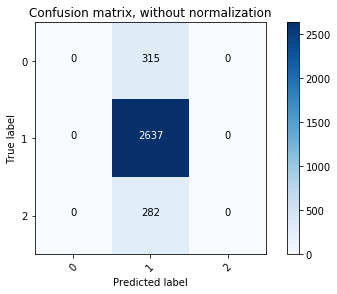

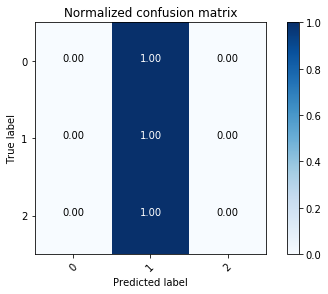

In [118]:
print("TRAIN CONFUSION MATRIX")
y_pred_train = clf.predict(X_train)
print_confusion_matrix(X_train, y_train, y_pred_train, 3)

TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[  0  36   0]
 [  0 294   0]
 [  0  32   0]]
Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


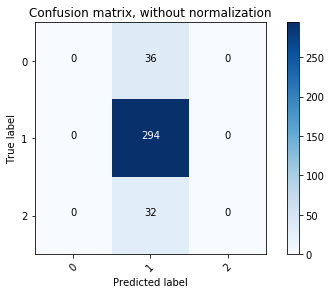

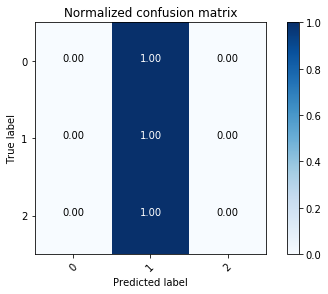

In [119]:
print("TEST CONFUSION MATRIX")
y_pred_test = clf.predict(X_test)
print_confusion_matrix(X_test, y_test, y_pred_test, 3)

In [120]:
%%time
file_texts_meaning, targets_meaning = load_from_directory(texts_directory="D:/svruchtel/DATA/France_New/Texts",
                                         images_directory="D:/svruchtel/DATA/France_New_ByMeaning", 
                                         target_names = ["GazolineStation", "Hotel", "Parking", "Restaurant",
                                                         "Taxi", "TollRoad", "Transport"])

Wall time: 349 ms


In [121]:
len(file_texts_shape)

3596

In [122]:
# tfidf matrix for all texts
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True)
X = vectorizer.fit_transform(file_texts_meaning)

In [123]:
X_train, y_train, X_test, y_test = divide_to_train_and_test(X, targets_meaning, 7)

In [124]:
clf = SVC()
clf.fit(X_train, y_train)
cr = classification_report(y_test, clf.predict(X_test))
print(cr)
acc = accuracy_score(y_test, clf.predict(X_test))
print("accuracy:", acc)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        35
          1       0.00      0.00      0.00        18
          2       0.00      0.00      0.00        27
          3       0.40      0.99      0.57       139
          4       0.00      0.00      0.00        28
          5       0.70      0.09      0.15        82
          6       0.00      0.00      0.00        23

avg / total       0.32      0.41      0.26       352

accuracy: 0.4090909090909091


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[   0    0    0  307    0    2    0]
 [   0    0    0  152    0    1    0]
 [   0    0    0  227    0    9    0]
 [   0    0    0 1234    0   14    0]
 [   0    0    0  241    0    4    0]
 [   0    0    0  665    0   67    0]
 [   0    0    0  198    0    2    0]]
Normalized confusion matrix
[[0.         0.         0.         0.99352751 0.         0.00647249
  0.        ]
 [0.         0.         0.         0.99346405 0.         0.00653595
  0.        ]
 [0.         0.         0.         0.96186441 0.         0.03813559
  0.        ]
 [0.         0.         0.         0.98878205 0.         0.01121795
  0.        ]
 [0.         0.         0.         0.98367347 0.         0.01632653
  0.        ]
 [0.         0.         0.         0.90846995 0.         0.09153005
  0.        ]
 [0.         0.         0.         0.99       0.         0.01
  0.        ]]


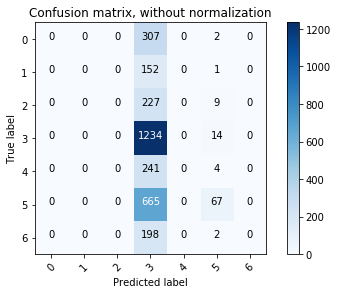

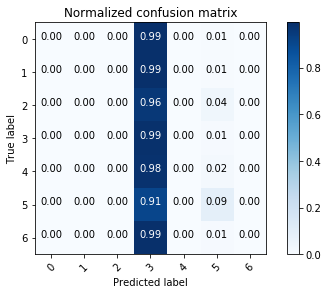

In [125]:
print("TRAIN CONFUSION MATRIX")
y_pred_train = clf.predict(X_train)
print_confusion_matrix(X_train, y_train, y_pred_train, 7)

TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[  0   0   0  35   0   0   0]
 [  0   0   0  18   0   0   0]
 [  0   0   0  26   0   1   0]
 [  0   0   0 137   0   2   0]
 [  0   0   0  28   0   0   0]
 [  0   0   0  75   0   7   0]
 [  0   0   0  23   0   0   0]]
Normalized confusion matrix
[[0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.96296296 0.         0.03703704
  0.        ]
 [0.         0.         0.         0.98561151 0.         0.01438849
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]
 [0.         0.         0.         0.91463415 0.         0.08536585
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]]


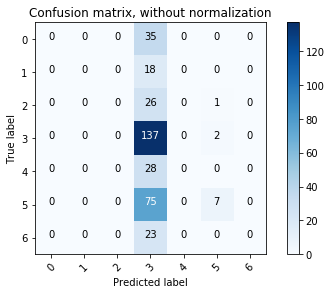

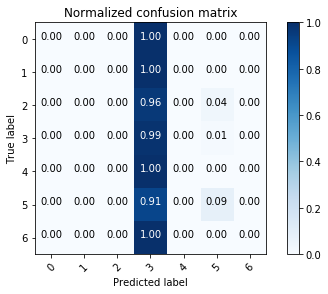

In [126]:
print("TEST CONFUSION MATRIX")
y_pred_test = clf.predict(X_test)
print_confusion_matrix(X_test, y_test, y_pred_test, 7)

In [127]:
%%time
file_texts_meaninglarge, targets_meaninglarge = load_from_directory(texts_directory="D:/svruchtel/DATA/France_New/Texts",
                                         images_directory="D:/svruchtel/DATA/France_New_ByMeaningLarge", 
                                         target_names = ["AllTransport", "Restaurant"])

Wall time: 330 ms


In [128]:
# tfidf matrix for all texts
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True)
X = vectorizer.fit_transform(file_texts_meaninglarge)

In [129]:
X_train, y_train, X_test, y_test = divide_to_train_and_test(X, targets_meaninglarge, 2)

In [133]:
clf = SVC()
clf.fit(X_train, y_train)
cr = classification_report(y_test, clf.predict(X_test))
print(cr)
acc = accuracy_score(y_test, clf.predict(X_test))
print("accuracy:", acc)

             precision    recall  f1-score   support

          0       0.58      1.00      0.74       193
          1       0.00      0.00      0.00       139

avg / total       0.34      0.58      0.43       332

accuracy: 0.5813253012048193


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [1248    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


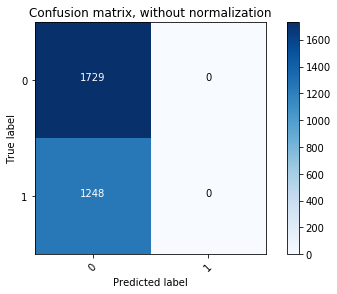

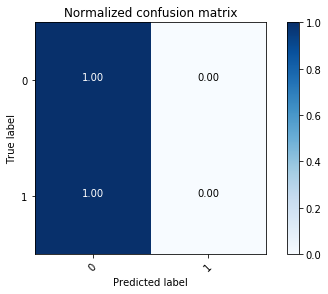

In [134]:
print("TRAIN CONFUSION MATRIX")
y_pred_train = clf.predict(X_train)
print_confusion_matrix(X_train, y_train, y_pred_train, 2)

TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[193   0]
 [139   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


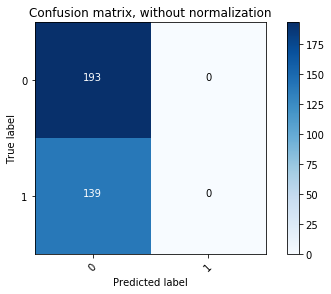

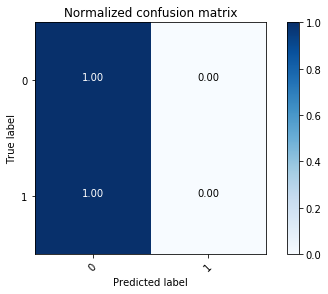

In [135]:
print("TEST CONFUSION MATRIX")
y_pred_test = clf.predict(X_test)
print_confusion_matrix(X_test, y_test, y_pred_test, 2)

In [140]:
string = file_texts_meaninglarge[3]

print(string)

i /   c a n t e e n   i n v o i c e 
 A L W A Y S   F R E S H .   A L W A Y S   O N   I n v o i c e   N o :   0 5 2 9 5 0 0 0 0 0 0 6 0 3 2 
 A c c o u n t   N o :   0 7 1 2 / 2 5 4 / 0 4 4 6 7 
 R e m i t   T o :   C a n t e e n   R e f r e s h m e n t   S e r v i c e s   I n v o i c e   D a t e   P l e a s e   P a y   D u e   D a t e 
 A   D i v i s i o n   o f   C a n t e e n 
 P . O .   B O X 4 1 7 6 3 2   i   6 / 2 6 / 2 0 1 7   *  %  $ 2 1 . 6 5   *   7 / 6 / 2 0 1 7 
 B o s t o n .   M A   0 2 2 4 1 - 7 6 3 2   _ | 
 B i l l   T o :   S I A   P A R T N E R S   S h i p   T o :   8 0 0   T O W N   &   C O U N T R Y   B L V D . # 3 0 0 
 8 0 0   T O W N   &   C O U N T R Y   B L V D .   # 3 0 0   8 0 0   T O W N   &   C O U N T R Y   B L V D . # 3 0 0 
 H O U S T O N ,   T X   7 7 0 2 4   W A Y N E   C A M P B E L L 8 3 2 - 2 4 8 - 1 0 4 1 
 H O U S T O N ,   T X   7 7 0 2 4 
 R o u t e   D r i v e r   O r d e r e d   B y   P a y m e n t   T e r m s   R e f   N u m b e r   P O   N 